In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# collecting data

titanic_data=pd.read_csv('C:/Users/VYSHNAVI/Downloads/titanic dataset/titanic.csv')
titanic_data.head(10)

In [7]:
print("no. of passengers in original data:" +str(len(titanic_data.index)))

no. of passengers in original data:891


In [8]:
# analysing data
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

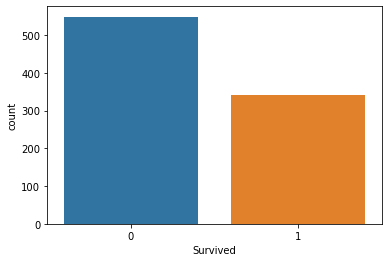

In [13]:
sns.countplot(x="Survived",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

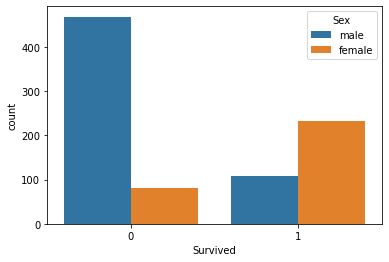

In [14]:
sns.countplot(x="Survived", hue="Sex",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

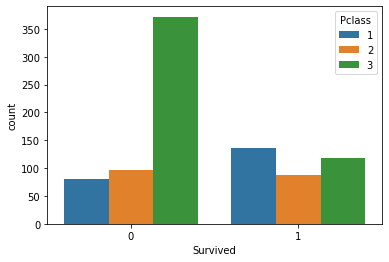

In [15]:
sns.countplot(x="Survived", hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

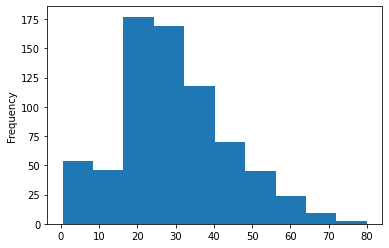

In [16]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

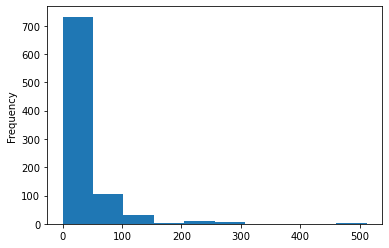

In [17]:
titanic_data["Fare"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

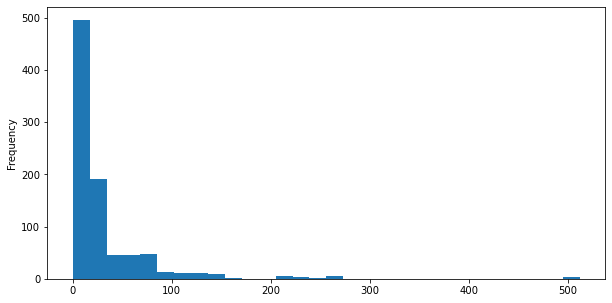

In [19]:
titanic_data["Fare"].plot.hist(bins=30, figsize=(10,5))

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

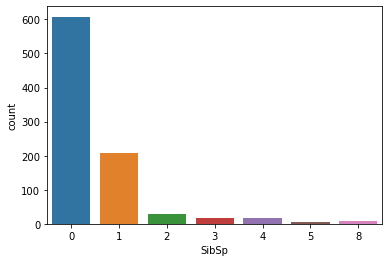

In [22]:
sns.countplot(x="SibSp",data=titanic_data)

# data wrangling: cleaning data

titanic_data.isnull() # returns true if it is a null value

In [24]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

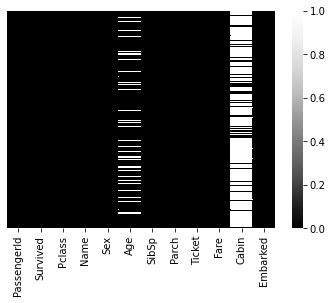

In [29]:
# plot a heatmap to analysis null values
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap="Greys_r") # cmap is for color coding

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

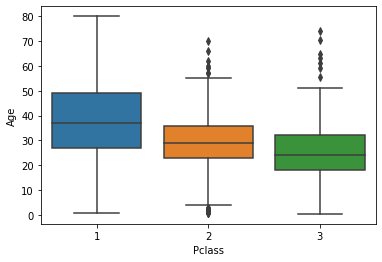

In [32]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
# drop null values
titanic_data.dropna(inplace=True)

<AxesSubplot:>

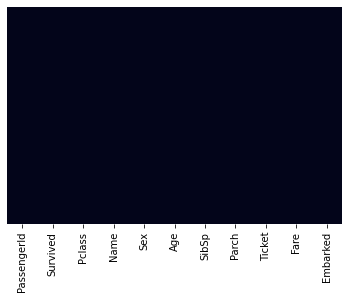

In [38]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cbar=False) # so no null values in graph

In [39]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
# there are a lot of string values but these have to be converted to categorical variables in order to apply logestic regression
# this can be done using pandas
# here we have to predict how many people tend to survive so to predit we need machine learning and it takes only binary values

In [41]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [44]:
# but one column is sufficient for us if its not male then it will be female
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [45]:
embark=pd.get_dummies(titanic_data["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [48]:
# in embark class also we can drop first column bcoz if he is not from Q and S then he will be from C
embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [49]:
Pcl=pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [50]:
# concatenating these all
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [51]:
titanic_data.drop(["Sex",'PassengerId','Pclass','Name','Ticket','Embarked'],axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# train Data

In [56]:
X=titanic_data.drop('Survived',axis=1) # independent variables in x axes or all variables excluding dependent one
y=titanic_data['Survived'] # column to be predicted in y axes

In [57]:
#split data into cleaning and testing

from sklearn.model_selection import train_test_split

#sk means StratifiedKFold

In [87]:
# to check about this use tab+shift keys
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel=LogisticRegression()

In [90]:
logmodel.fit(X_train,y_train)

C:\Users\VYSHNAVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=800)

In [92]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [93]:
predictions= logmodel.predict(X_test)

In [94]:
# calculate accuracy and report
from sklearn.metrics import classification_report

In [95]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.82       139\n           1       0.74      0.73      0.74        96\n\n    accuracy                           0.79       235\n   macro avg       0.78      0.78      0.78       235\nweighted avg       0.79      0.79      0.79       235\n'

In [96]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test, predictions)

array([[115,  24],
       [ 26,  70]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test, C)

0.7872340425531915

In [105]:
print(y_test)

689    1
279    1
508    0
9      1
496    1
      ..
104    0
441    0
532    0
435    1
569    1
Name: Survived, Length: 235, dtype: int64


In [106]:
print(predictions)

[1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 0 1 0]


 # SUV predictions

In [100]:
suv_data=pd.read_csv('C:/Users/VYSHNAVI/Downloads/suv-datset/SUV_Purchase.csv')

In [101]:
suv_data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

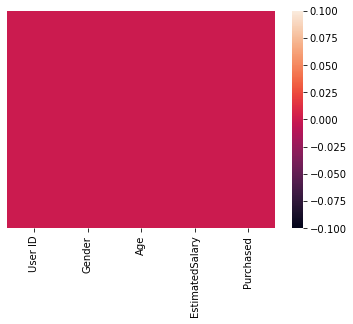

In [104]:
sns.heatmap(suv_data.isnull(), yticklabels=False)

In [109]:
X=suv_data.iloc[:,[2,3]].values # all rows and 2 and 3 columns i.e.,age and estimated salary are independent variables
y=suv_data.iloc[:,4].values # all rows and purchased column is dependent variable

In [110]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [111]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [113]:
from sklearn.preprocessing import StandardScaler

In [115]:
X_test=StandardScaler().fit_transform(X_test)
X_train=StandardScaler().fit_transform(X_train)